<h1><u>Implementing KNN from Scratch</u></h1>

<b>This notebook will see us implementing a KNN algorithm, lets begin by building our intuiton
    on the model and how it works!</b>

Walk through what X is and what y is. 

X - Features
y - Target

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# Give example of iris data
data = datasets.load_iris() # Loads a dict examine it

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [23]:
# This is a 2d array of the features of our dataset
X_train[:5]

array([[6. , 2.2, 4. , 1. ],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 3.5, 1.4, 0.3],
       [7.3, 2.9, 6.3, 1.8],
       [4.9, 3.1, 1.5, 0.1]])

In [91]:
# This is a 1d array of the target classes of our dataset
y_train[:5]

array([0, 0, 0, 0, 0])

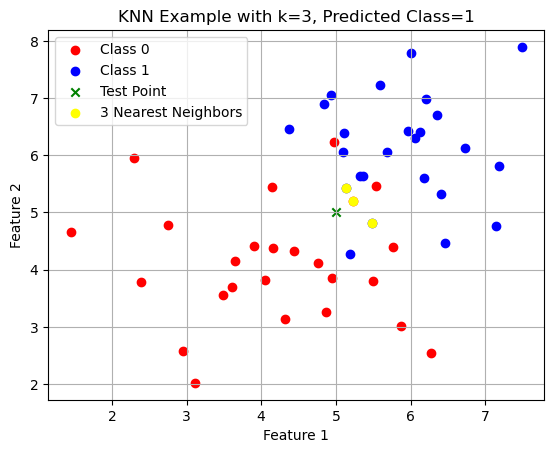

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data
np.random.seed(0)
X_class0 = np.random.normal(4, 1, size=(25, 2))  # Class 0
X_class1 = np.random.normal(6, 1, size=(25, 2))  # Class 1
X_train = np.vstack([X_class0, X_class1])
y_train = np.array([0]*25 + [1]*25)

# Create a test point
X_test = np.array([[5, 5]])
#X_test = np.random.normal(8, 1, size=(50,2))

# Create and train KNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict label for test point
y_pred = knn.predict(X_test)

# Get k nearest neighbors
distances, indices = knn.kneighbors(X_test)
k_nearest = X_train[indices][0]

# Plotting
plt.scatter(X_class0[:, 0], X_class0[:, 1], label='Class 0', c='red')
plt.scatter(X_class1[:, 0], X_class1[:, 1], label='Class 1', c='blue')
plt.scatter(X_test[0, 0], X_test[0, 1], label='Test Point', c='green', marker='x')
plt.scatter(k_nearest[:, 0], k_nearest[:, 1], label=f'{k} Nearest Neighbors', c='yellow', marker='o', facecolors='none')
plt.legend()
plt.title(f'KNN Example with k={k}, Predicted Class={y_pred[0]}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

The main part of KNN is the distance algorithm, we will work on implementing the euclidean distance algorithm which will give us the distance between two vectors. The vectors being X_train (features we have labels for in y_train which will be used to train the model) and X_test (the features we have no labels for and are predicting the label).

<img src="https://www.gstatic.com/education/formulas2/553212783/en/euclidean_distance.svg">

In [4]:
# Break down the euclidean distance formula and get it written down in code
# 1 - The sum is a for loop over all elements in the vectors
# 2 - You take the difference between both vectors (an elementwise operation HINT: Use numpy arrays)
# 3 - Square the sum of differences
# 4 - sqrt the results
# So how would we implement this?

def euclidean_distance(p, q):
    distance = 0
    for i in range(len(q)):
        distance += (p[i] - q[i])**2
    
    return distance**0.5

In [5]:
arr1 = np.array([1,2,3,1,2,3,4,5,6])
arr2 = np.array([1,2,3,5,4,3,9,10,3])

arr1 - arr2

array([ 0,  0,  0, -4, -2,  0, -5, -5,  3])

In [14]:
# Give example of iris data
data = datasets.load_iris() # Loads a dict examine it

X = data.data[:10]
y = data.target[:10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_test

array([[5. , 3.6, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.2]])

In [16]:
X_train

array([[4.6, 3.4, 1.4, 0.3],
       [4.4, 2.9, 1.4, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.9, 1.7, 0.4],
       [4.9, 3. , 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [17]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# Lets use our ED function on our iris data, this will calculate the distance between our 2 test features and 
# all train features
y_preds = []

k = 3

for test_feature in X_test:
    distances = []
    for x in X_train:
        print(euclidean_distance(test_feature, x))
        
        # Use list after showing with just printing
        distances.append(euclidean_distance(test_feature, x))
        # We do not need to explicitly store the index, the ith element in the distances array is the distance between
        # test_feature and the ith neihbour
    print(f'test_feature: {test_feature}, {distances}')

    # we cant use .sort() as it would mess up the indices
    distances = np.argsort(distances)
    print(distances)  # We use argsort as it sorts the array and returns the indices which would
                                  # sort the array not the sorted array
    k_nearest_neighbours = []
    # :k sets k NN
    for i in distances[:k]:
        k_nearest_neighbours.append(y_train[i])
    
    print(k_nearest_neighbours)
    
    # Now we need to vote on the majority class in the nearest neighbours
    count_dict = {}
    for i in k_nearest_neighbours:
        if i in count_dict:
            count_dict[i] += 1
        else:
            count_dict[i] = 1
    
    print(count_dict)
    y_preds.append(max(count_dict, key=count_dict.get))
    break

print(y_preds)

0.4582575694955844
0.9219544457292886
0.22360679774997916
0.5099019513592783
0.529150262212918
0.6164414002968979
0.608276253029822
0.6480740698407862
test_feature: [5.  3.6 1.4 0.2], [0.4582575694955844, 0.9219544457292886, 0.22360679774997916, 0.5099019513592783, 0.529150262212918, 0.6164414002968979, 0.608276253029822, 0.6480740698407862]
[2 0 3 4 6 5 7 1]
[0, 0, 0]
{0: 3}
[0]


In [ ]:
# So now we can calculate the distance between two points, bear in mind the limitations of this algorithm
# The arrays must have the same length (i.e. the same number of features)
# So we need a way to calculate the distance between each test features and all train features, and each time
# we take the k closest train features to our test feature and mark the class of that feature of the majority
# of the k closest.

# So our predict class must:
# - Calculate the distance between each test feature vector and all train feature vectors
# - Store the top K, we must store the indexes as to access the the labels in the y vector we need to index,
#   so we store the index of top K feature vectors
# - We store the labels of the K-Nearest Neighbours and take the majority label as the label of our x test 
#   feature



In [ ]:
# Loss function
